# GRADED CHALLENGE 6
```
Nama  : Talitha Salsabila
Batch : RMT-032

File ini berisi clustering model untuk membuat customer segmentation dari data kartu kredit sebuah bank. Dataset yang digunakan berisi informasi penggunaan kartu kredit selama 6 bulan terakhir.

```

## SQL Query

In [ ]:
# SELECT *
# FROM `ftds-hacktiv8-project.phase1_ftds_032_rmt.credit-card-information`
# WHERE MOD(CUST_ID, 2) = 0

## Import libraries

In [37]:
# Import library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

## Data loading

In [38]:
#loading data

data = pd.read_csv('P1G6_Set_1_talitha_salsabila.csv.csv')


In [39]:
#menampilkan 10 data pertama

data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125000,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,4266,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
6,4360,2730.843802,1.000000,2900.0,2900.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2900.0,0.000000,NaN,0.0,8
7,4680,424.994385,0.375000,1200.0,1200.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1200.0,57.266292,56.720210,0.0,8
8,5884,18.885677,0.375000,57.0,57.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
9,24,0.004816,0.545455,51.7,0.0,51.7,0.0,0.250,0.000,0.250,0.0,0,3,3000.0,33.249088,0.059481,0.0,12


In [40]:
#menampilkan 10 data terakhir

data.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,1588,538.768762,0.909091,226.95,129.58,97.37,452.009130,0.545455,0.090909,0.454545,0.272727,8,9,1200.0,946.649324,211.220001,0.000000,11
4466,6900,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11
4467,2528,427.642111,0.888889,0.00,0.00,0.00,2563.705644,0.000000,0.000000,0.000000,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4468,1226,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9
4469,2152,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Seluruh data dalam tabel bertipe numerik (integer & float). Selain itu, terdapat missing value pada kolom 'CREDIT_LIMIT' dan 'MINIMUM_PAYMENTS'.

In [42]:
#mengecek missing value pada data

data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

kolom 'CREDIT_LIMIT' memiliki 1 missing value, sedangkan kolom 'MINIMUM_PAYMENTS'memiliki 158 missing value.

Sebelum lanjut ke EDA, kolom 'CUST_ID' akan dihapus karena tiap row memiliki nilai yang unik, karenanya, tidak akan menjadi pembeda untuk pembuatan cluster.

In [43]:
#drop kolom CUST_ID

data.drop(['CUST_ID'], axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

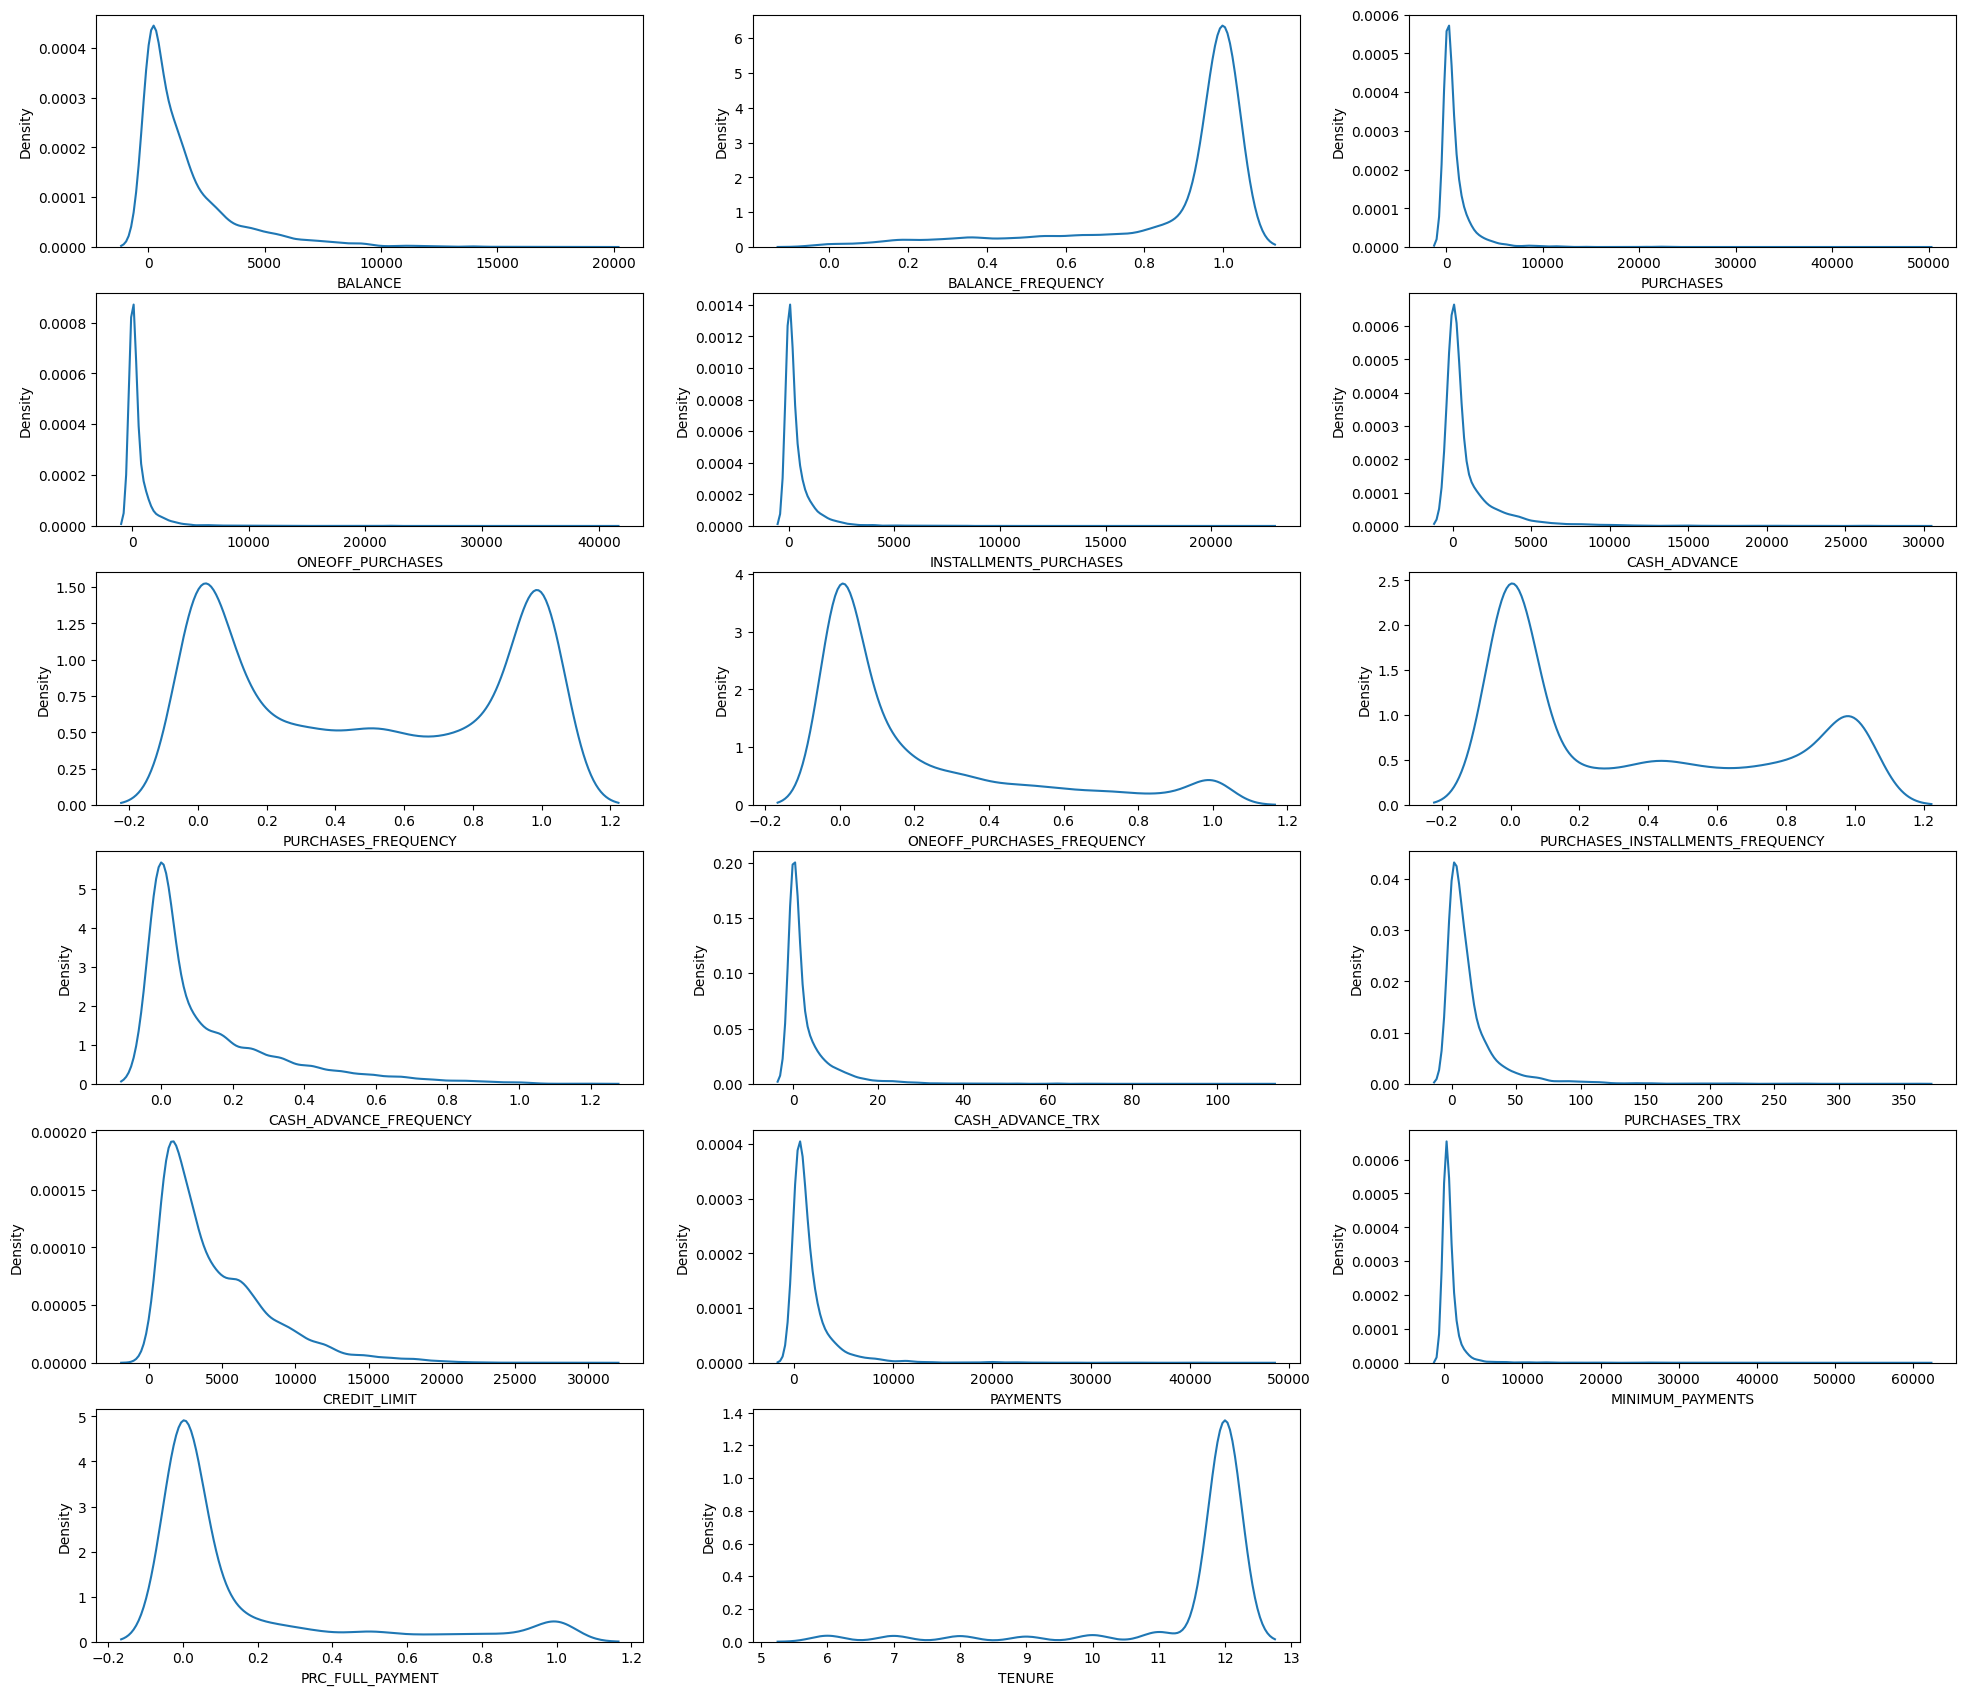

In [44]:
#melihat distribusi data

plt.figure(figsize=(24,32))
for i, col in enumerate(data.columns):
        ax = plt.subplot(9, 3, i+1)
        sns.kdeplot(data[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

Grafik diatas menunjukkan distribusi data yang tidak normal atau sangat skewed. Pada grafik 'TENURE' terlihat customer paling banyak mengambil tenure selama 12 bulan, yang artinya kebanyakan customer lebih memilih untuk membayar kredit card dengan jangka waktu yang panjang. Kemudian , grafik 'PURCHASE_FREQUENCY' memiliki 2 peak, yaitu di angka 0 dan 1. Ini menunjukkan perilaku customer dalam hal seberapa sering mereka berbelanja cukup beragam.

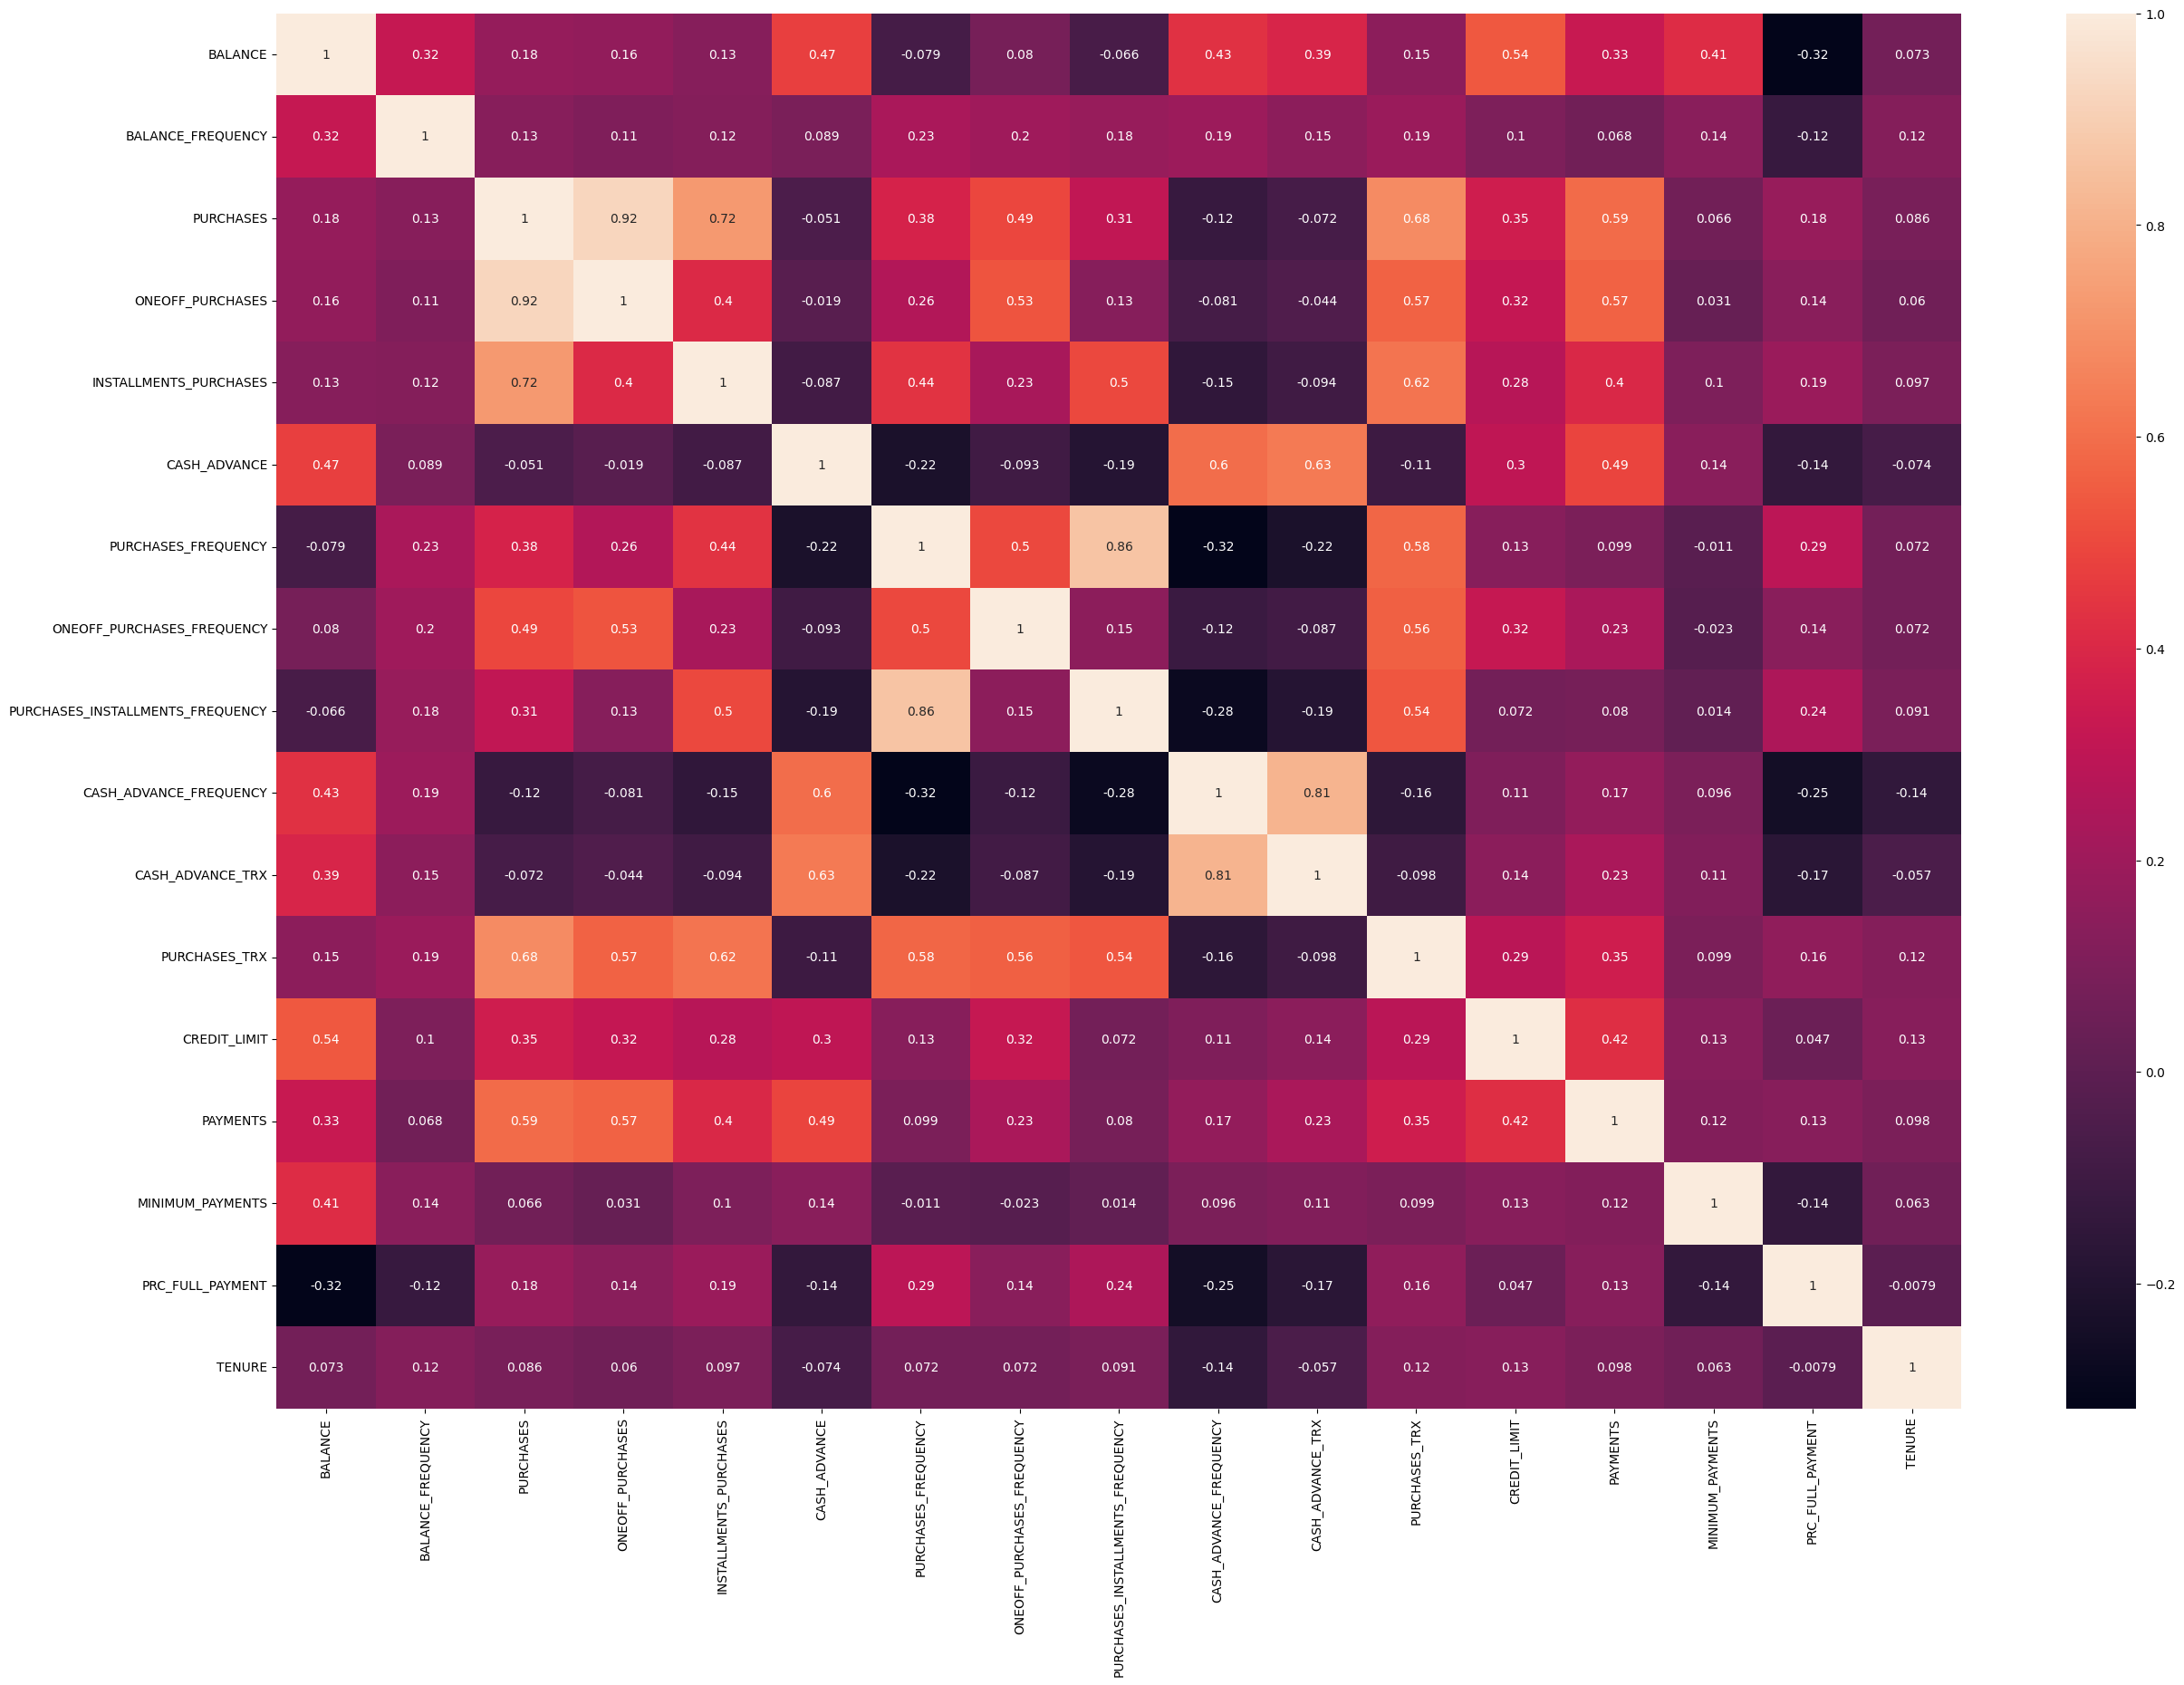

In [45]:
#melihat korelasi antar feature

plt.subplots(figsize=(30,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

Korelasi antar feature cukup beragam. Feature 'PURCHASE_TRX' terlihat banyak memiliki korelasi moderat dengan feature lainnya dengan corr sekitar 0.5. Korelasi yang kuat ditunjukkan oleh feature 'ONEOFF_PURCHASES' dengan 'PURCHASES' (0.92), 'INSTALLMENT_PURCHASES' dengan 'PURCHASES' (0.72), 'PURCHASES_INSTALLMENTS_FREQUENCY' dedngan 'PURCHASES_FREQUENCY' (0.86), 'CASH_ADVANCE_TRX' dengan 'CASH_ADVANCE_FREQUENCY' (0.81).

## Feature engineering

### Handling missing value

In [46]:
#mengecek missing value pada data

data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat hanya 1 missing value pada kolom 'CREDIT_LIMIT', untuk itu saya memilih untuk drop datanya.

In [47]:
#drop missing value pada kolom CREDIT_LIMIT

data.dropna(subset=['CREDIT_LIMIT'], inplace=True)

Terdapat 158 missing values pada kolom 'MINIMUM_PAYMENTS'. Missing values akan di handle dengan menggantinya dengann nilai median. Dengan data yang skewed, mengganti dengan nilai median akan memberikan distribusi data yang lebih baik.

In [48]:
#input missing value pada kolom MINIMUM_PAYMENTS dengan nilai median

data.fillna({'MINIMUM_PAYMENTS':data['MINIMUM_PAYMENTS'].median()}, inplace=True)

### Handling outliers

In [49]:
#melihat persen outlier untuk data train

for k, v in data.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column BALANCE outliers = 7.55%
Column BALANCE_FREQUENCY outliers = 16.63%
Column PURCHASES outliers = 8.56%
Column ONEOFF_PURCHASES outliers = 10.89%
Column INSTALLMENTS_PURCHASES outliers = 9.19%
Column CASH_ADVANCE outliers = 11.51%
Column PURCHASES_FREQUENCY outliers = 0.00%
Column ONEOFF_PURCHASES_FREQUENCY outliers = 8.47%
Column PURCHASES_INSTALLMENTS_FREQUENCY outliers = 0.00%
Column CASH_ADVANCE_FREQUENCY outliers = 8.45%
Column CASH_ADVANCE_TRX outliers = 10.55%
Column PURCHASES_TRX outliers = 8.61%
Column CREDIT_LIMIT outliers = 3.62%
Column PAYMENTS outliers = 8.83%
Column MINIMUM_PAYMENTS outliers = 9.57%
Column PRC_FULL_PAYMENT outliers = 15.31%
Column TENURE outliers = 100.00%


Hampir semua features memiliki outliers, kecuali 'PURCHASES_FREQUENCY'. Karena itu, outliers akan di handle dengan metode capping. Seluruh data, kecuali dari feature 'PURCHASES_FREQUENCY' dan 'TENURE' akan di-capping dengan metode IQR mengingat data yang sangat skewed (terlihat di grafik pertama EDA). Feature 'TENURE' tidak di-capping walaupun menunjukkan outliers 100%, karena variance yang sedikit.

In [50]:
#handling outliers dengan IQR capping

from feature_engine.outliers import Winsorizer

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails
                          fold=1.5,
                          variables=['BALANCE','BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                                     'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS',
                                     'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])

windsoriser.fit(data)

data_capped = windsoriser.transform(data)

### Scaling

Sebelum metode PCA diaplikasikan, data perlu di standarisasi supaya memiliki means=0 dan variance=1. Feature scaling dilakukan menggunakan standard scaler, yang mengubah range data menjadi 0 sampai 1.

In [51]:
# Feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_capped)

### PCA

Sebelum data di cluster, teknik PCA diaplikasikan untuk mereduksi dimensi dengan mengeliminasi feature yang kurang esensial dalam analisa.

In [52]:
# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data_scaled)

PCA()

Text(0, 0.5, 'Eigenvalues')

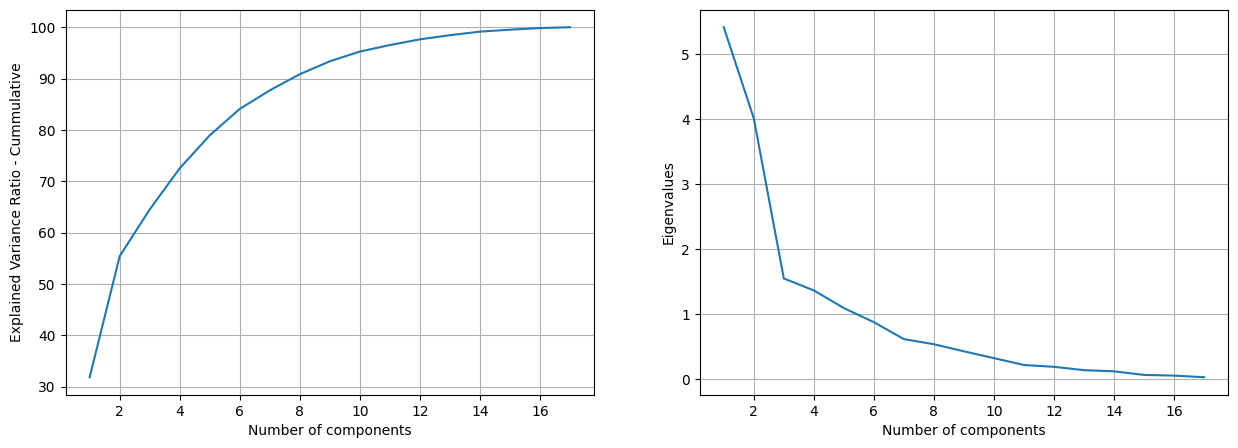

In [53]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 18), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 18), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

Dari grafik di atas (kiri) kita dapat mengetahui berapa komponen yang harus di analisa untuk me-retain tingkat informasi tertentu. Misalnya, jika kita ingin me-retain 90% informasi, maka jumlah komponen yang harus diikut-sertakan dalam analisa ialah 8 komponen. Sedangkan grafik diatas memperlihatkan hubungan eigen value dengan jumlah komponen. Jumlah komponen dengan eigen value >1 merupakan salah satu cara untuk mengetahui berapa komponen yang harus diikutkan. Contohnya, pada grafik diatas, jumlah komponen yang harus di retain (eigen values=1) adalah <=5 komponen.

In [54]:
# Check the number of features if we want to retain 90 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.90) + 1
num_features

8

Model clustering yang akan dibuat akan memakai setidaknya 90% informasi. Untuk itu, 8 features akan digunakan dalam analisa.

In [55]:
# Let's train the model with reducing to 2 component

pca = PCA(n_components=8)
pca.fit(data_scaled)

X_scaled_pca = pca.transform(data_scaled)

## Modelling

### Elbow method

Sebelum membuat cluster pada data, jumlah cluster (k) harus ditentukan terlebih dahulu. Salah satu cara menentukan nilai k ialah dengan menganalisa plot WCSS dengan nilai k, atau disebut dengan The Elbow Method. Cara ini termasuk cukup subjektif karena nilai k yang optimum ditentukan dengan melihat 'patahan' pada grafik. Patahan yang dimaksud ialah dengan melihat pada titik mana laju turun nilai WCSS melambat.

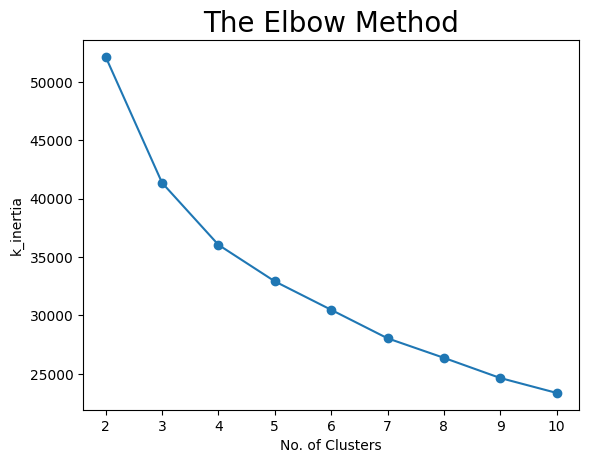

In [56]:
k_inertia = []
#membuat iterasi dari 2-10 untuk nilai k terbaik
for i in range(2, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
    km.fit(X_scaled_pca)
    k_inertia.append(km.inertia_)

plt.plot(range(2, 11), k_inertia, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('k_inertia')
plt.show()

Dari grafik Elbow Method diatas, menurut saya jumlah cluster yang tepat ialah 3 atau 4 cluster.

### Silhouette method

Cara lain untuk mennetukan jumlah cluster ialah dengan menggunakan silhoutte method. Silhouette score mengukur seberapa mirip tiap data point pada clusternya dibanding dengan cluster lain. Points terklasifikasi dengan tepat akan ditunjukkan dengan score 1, cluster yang overlapping ditunjukkan dengan score 0, sedangkan points yang misklasifikasi pada cluster yang salah ditunjukkan dengan score -1.

In [57]:
# Function to create Silhouette Plot

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.24164632268641467
For n_clusters = 3 The average silhouette_score is : 0.24262106863183588
For n_clusters = 4 The average silhouette_score is : 0.22073476639885392
For n_clusters = 5 The average silhouette_score is : 0.2139909853993076


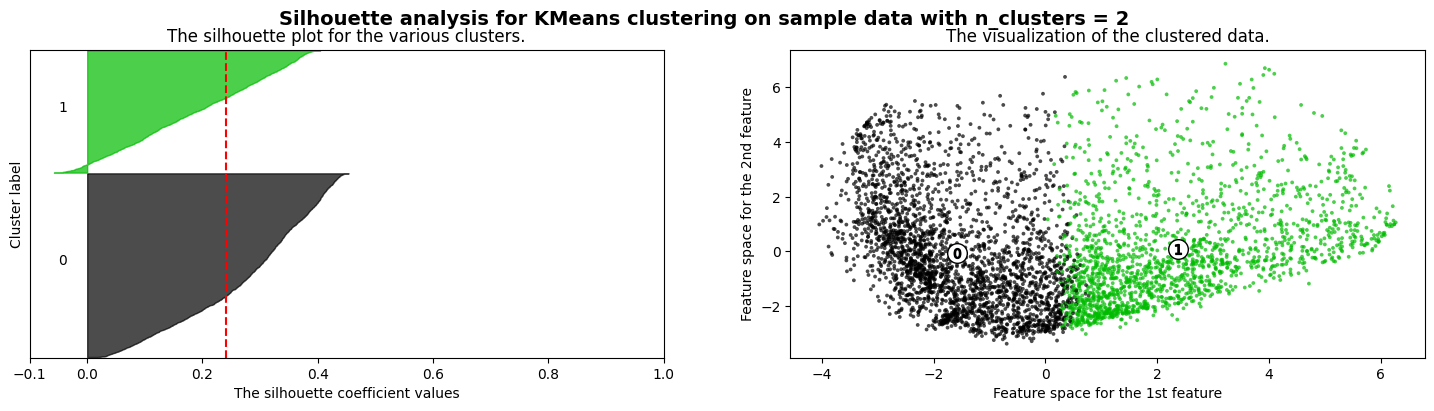

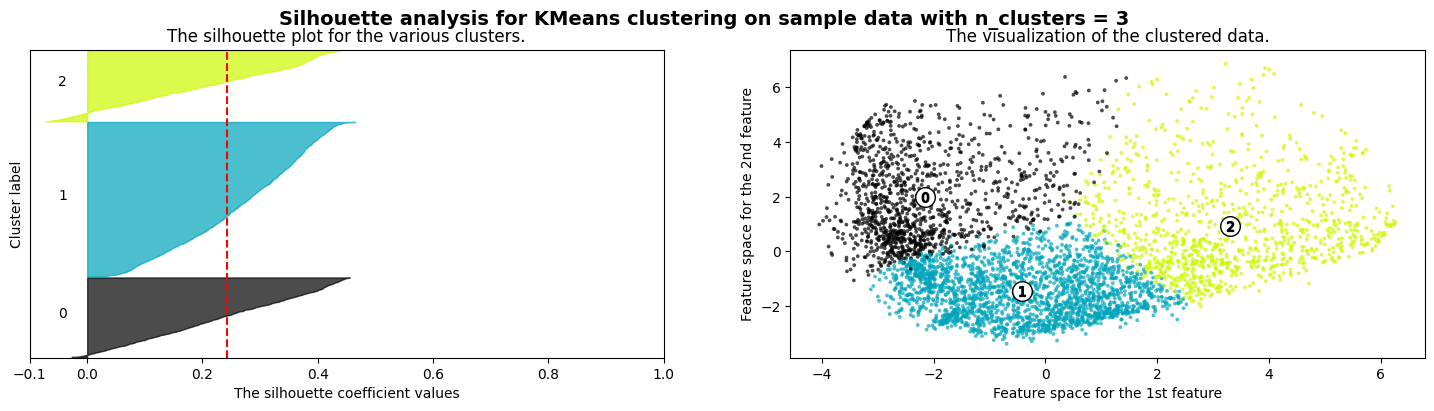

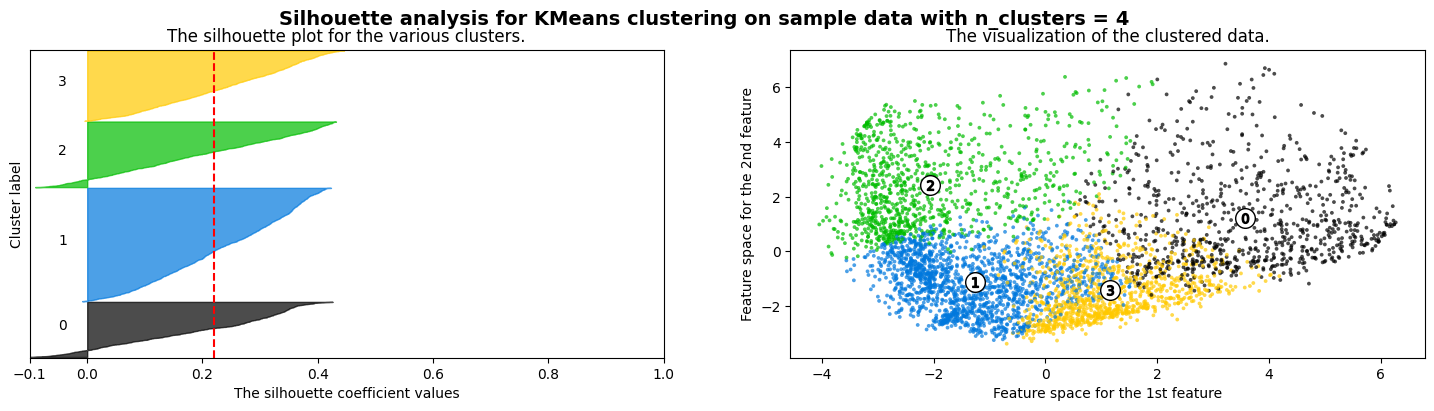

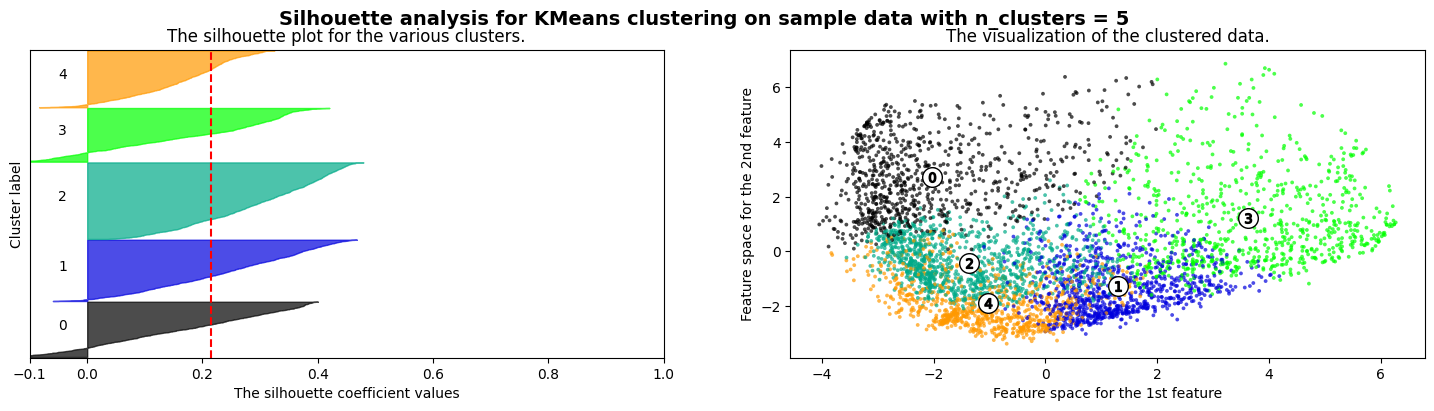

In [58]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, 6), X_scaled_pca, 3)

Silhouetter score untuk 3 cluster merupakan yang tertinggi diantara jumlah cluster lainnya, dengan nilai 0.242. Angka ini cukup jauh dari nilai 1, yang berarti terdapat beberapa data points yang overlapping. Dengan menimbang silhouette score dan plot yang dihasilkan, saya akan menggunakan 3 cluster dalam analisa. Analisa dengan 3 cluster menghasilkan silhouette score tertinggi dan visualisasi persebaran data yang menurut saya lebih baik karena pembagian points terhadap cluster lebih imbang.

### K-means

K-Means merupakan metode clustering berdasarkan posisi data points terhadap centroid nya. Metode ini membagi dataset kedalam jumlah cluster yang ditentukan. Dengan menggunakan Euclidean Distance sebagai metriknya, metode ini dapat menentukan dissimilarity antar data points dengan centroidnya.

In [59]:
#membuat model k-means

km = KMeans(n_clusters = 3, random_state = 3)
km.fit(X_scaled_pca)

KMeans(n_clusters=3, random_state=3)

In [60]:
pred = km.predict(X_scaled_pca)
pred

array([2, 2, 2, ..., 0, 0, 0])

In [61]:
#iterasi keberapa dia konvergen

km.n_iter_

18

Model menjadi konvergen pada iterasi ke-18

In [62]:
# Insert clustering result into original dataset

data_kmeans = data.copy()
data_kmeans['cluster'] = pred
data_kmeans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,309.983200,0.000000,8,2
1,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8,2
2,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,309.983200,0.000000,8,2
3,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8,2
4,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11,0
4471,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11,0
4472,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11,0
4473,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11,0


## EDA after clustering

<Axes: >

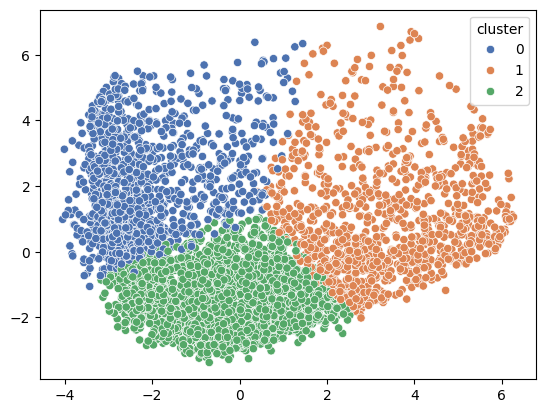

In [63]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(data_scaled)

X_scaled_pca_2d = pca_2d.fit_transform(data_scaled)

#scatter PC1 & PC2
sns.scatterplot(x=X_scaled_pca_2d[:,0], y=X_scaled_pca_2d[:,1], hue=data_kmeans['cluster'], palette='deep')

Pada plot PCA diatas, persebaran data dengan cluster 0, 1, dan 2 terlihat cukup seimbang walaupun terlihat beberapa data yang overlapping.

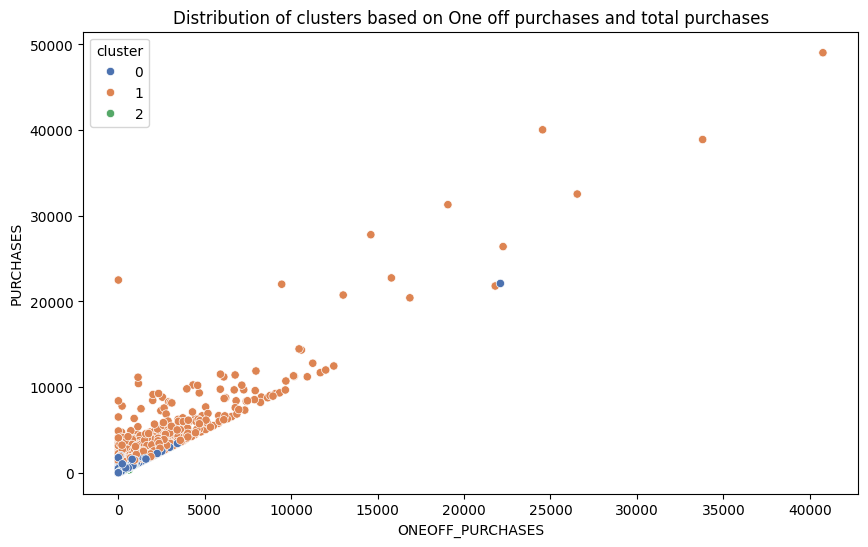

In [64]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data_kmeans, x='ONEOFF_PURCHASES', y='PURCHASES', hue= 'cluster', palette='deep')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

Pada plot diatas, terlihat cluster 1 (orange) memiliki rata-rata purchase yang lebih tinggi dari cluster lainnya.

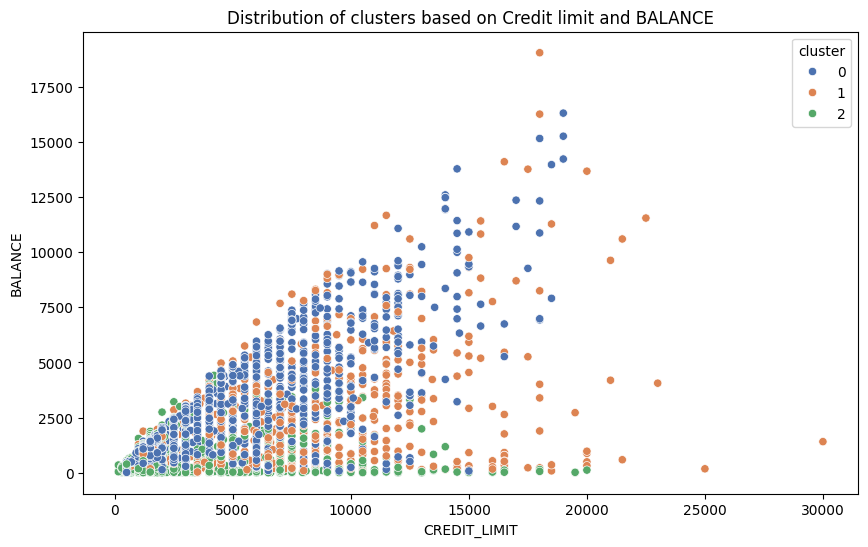

In [65]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data_kmeans, x='CREDIT_LIMIT', y='BALANCE', hue='cluster', palette='deep')
plt.title('Distribution of clusters based on Credit limit and BALANCE')
plt.show()

Plot balance vs credit limit menunjukkan adanya hungungan diantara kedua feature tersebut. Orang yang memiliki credit limit rendah, memiliki balance yang rendah pula. Namun, semakin tinggi credit limit, semakin luas range balance yang dimiliki. Pada plot diatas, cluster 0 dan 1 terlihat banyak mendominasi balance yang tinggi.

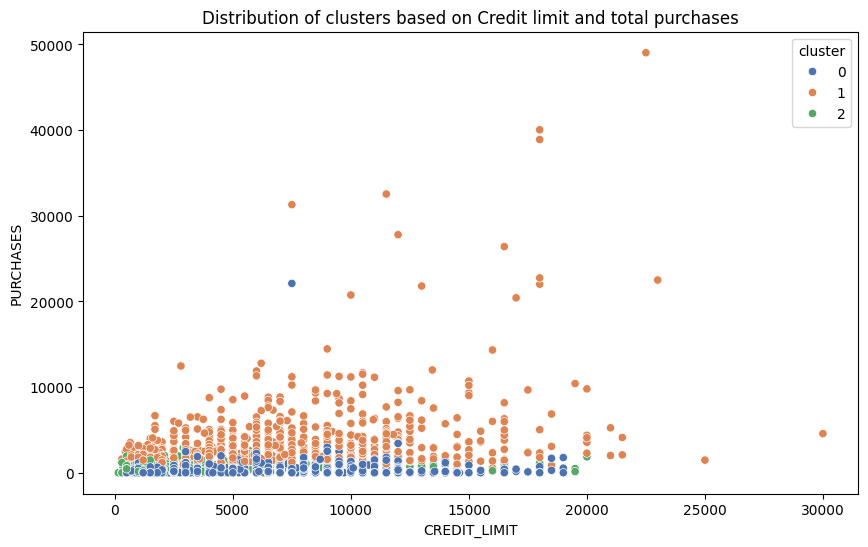

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data_kmeans, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster', palette='deep')
plt.title('Distribution of clusters based on Credit limit and total purchases')
plt.show()

Pada plot purchases vs credit limit, terlihat jelas segmentasi cluster yang memiliki jumlah purchase tinggi dan rendah. cluster 0 dan 2 rata-rata memiliki jumlah purchase <10000, sedangkan cluster 1 memiliki range yang lebih luas, dengan maksimum purchase hampir 50000.

### Clustering conclusions

In [67]:
# Summarize Mean of Each Clusters
df_cluster_summary = data_kmeans.groupby('cluster').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

df_profile = df_cluster_summary.reset_index()
df_profile.style.background_gradient(cmap='YlOrBr')


cluster,Column Name,Metrics,0,1,2
0,BALANCE,mean,3132.859630,1968.394107,577.347275
1,BALANCE_FREQUENCY,mean,0.944723,0.973231,0.799722
2,PURCHASES,mean,251.898919,3180.133699,394.026687
3,ONEOFF_PURCHASES,mean,170.247170,1938.220915,186.421890
4,INSTALLMENTS_PURCHASES,mean,81.709168,1242.005520,208.265458
5,CASH_ADVANCE,mean,2923.649579,546.480663,167.311007
6,PURCHASES_FREQUENCY,mean,0.181931,0.905839,0.458548
7,ONEOFF_PURCHASES_FREQUENCY,mean,0.077894,0.544235,0.110553
8,PURCHASES_INSTALLMENTS_FREQUENCY,mean,0.107007,0.698455,0.345180
9,CASH_ADVANCE_FREQUENCY,mean,0.370171,0.071300,0.041653


Hasil analisa menghasilkan 3 cluster, yang dapat disimpulkan sebagai berikut:

- CLUSTER 0 memiliki balance dan cash advance yang paling tinggi. Kemudian, cash advance transaction secara signifikan menjadi yang paling tinggi diantara cluster lainnya. Namun, nilai purchase pada cluster ini tergolong sangat rendah. Dengan balance frequency yang sering berganti / updated, cluster 0 merupakan pengguna aktif kartu kredit. Namun, kelompok ini cenderung menggunakan kartu kredit untuk withdraw atau cash advance.

- CLUSTER 1 memiliki nilai purchase tertinggi, komponen lain yang terkait dengan purchase juga memiliki nilai tinggi, seperti purchase frequency, one-off purchases frequency, purchases transaction, dan purchases installments frequency. Selain purchases, payments dan credit limit pada cluster 1 juga menjadi yang tertinggi. Insight tersebut mengindikasikan bahwa cluster 1 terdiri dari pengguna yang secara aktif menggunakan kartu kredit untuk berbelanja.

- CLUSTER 2 memiliki rata-rata balance yang jauh lebih rendah dari 2 cluster sebelumnya. Selain itu, rata-rata purchases, cash advance, credit limit, dan payment juga mempunyai nilai paling rendah. Kemudian, nilai balance frequency yang relatif renah menunjukkan pengguna pada cluster 2 adalah pengguna yang paling jarang memakai kartu kredit. Ciri-ciri ini sesuai dengan karakter pengguna baru atau mahasiswa.

## Conclusions

Analisa ini bertujuan untuk membuat cluster dari dataset credit crard sebuah bank. Data dipersiapkan dengan cara menghandle missing value & outliers, melakukan scaling data, dan mereduksi dimensi data menggunakan PCA. Proses clustering menggunakan K-Means method, dengan nilai k ditentukan melalui penilaian terhadap elbow method dan silhouette method. Nilai k yang digunakan ialah 3. Pada rangkuman nilai feature tiap cluster, terdapat nilai unik yang membedakan tiap cluster. Karakteristik unik tiap cluster dapat dianalisa lebih lanjut untuk menentukan strategi marketing yang tepat.

K-Means clustering merupakan metode yang sederhana dan relatif cepat untuk dataset yang besar. Yang perlu diperhatikan dalam memakai metode ini ialah outliers dan pemilihan nilai k yang tepat. Selain itu, metode K-Means juga sensitif terhadap penempatan awal centroid, yang dapat menyebabkan hasil clustering berbeda tiap inisialisasi.

## Conceptual problems

1. **Apakah yang dimaksud dengan inertia pada algoritma K-Means ?**

    Innertia atau WCSS (Within Cluster Summation of Squares) bertujuan untuk mencari model mana yang memiliki performa lebih baik pada saat proses random initialization K points, dengan cara mengukur jarak tiap points dari masing-masing centroidnya.

2. **Jelaskan yang dimaksud dengan Elbow Method (alasan    penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !**

    The Elbow Method adalah salah satu cara menentukan jumlah cluster yang optimal dengan menganalisa plot antara WCSS dengan nilai k. 
    
    Langkah utama untuk membuat elbow plot ialah dengan kalkulasi WCSS untuk tiap nilai k. Kemudian membuat plot WCSS (y-axis) terhadap nilai k (x-axis). Terakhir, elbow point dapat diidentifikasi dengan melihat 'patahan' pada grafik. Patahan yang dimaksud ialah dengan melihat pada titik mana WCSS menurun dedngan laju yang sangat lambat.

    Elbow method tergolong relatif sederhana dan mudah. Namun metode ini cukup subjectif, terlebih jika patahan pada elbow point tidak terlihat jelas. Kemudian, tidak semua dataset cocok dengan menggunakan metode ini, terutama dataset dengan bentuk cluster yang tidak teratur.
